In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import importlib
import sys

sys.path.append('../')

try:
    importlib.reload(star_props.helium_flash)
except:
    import star_props.helium_flash

from star_props.helium_flash import HeliumDeflagration as deflag    


matplotlib.rcParams['figure.figsize'] = [15.0, 10.0]
matplotlib.rcParams.update({'font.size': 22})



In [3]:
powM=(39-17)/np.log10(1.212e+24/9.096e+2)
coeff=10**39/(1.212e+24)**powM
ETimmes_trig = lambda M:  coeff*M**powM
ETimmes_trig= np.vectorize(ETimmes_trig)

In [8]:
temps = np.arange(0.1,1.5,0.08)
rhos=[6e4,6e5,6e6,6e7]
tcold=1e7

#linear_cylinder_widths= [[ deflag(rho, tcold, tcrit=t*1e9,thermal_width='linear',k=1).lambda_t for t in temps]  for rho in rhos]
#linear_sphere_widths= [[ deflag(rho, tcold, tcrit=t*1e9,thermal_width='linear',k=2).lambda_t for t in temps]  for rho in rhos]
#simple_widths= [[ deflag(rho, tcold, tcrit=t*1e9,thermal_width='simple').lambda_t for t in temps]  for rho in rhos]
timmes_widths= [[ deflag(rho, tcold, tcrit=t*1e9,thermal_width='timmes').lambda_t for t in temps]  for rho in rhos]
timmes_data = np.array([[Timmes2000DataLine1[::,0],Timmes2000DataLine1[::,1]],[Timmes2000DataLine2[::,0],Timmes2000DataLine2[::,1]],
                [Timmes2000DataLine3[::,0],Timmes2000DataLine3[::,1]],[Timmes2000DataLine4[::,0],Timmes2000DataLine4[::,1]]])

timmes_Etrig = [[ deflag(rho, tcold, tcrit=t*1e9,thermal_width='timmes').E_trigger() for t in temps]  for rho in rhos]



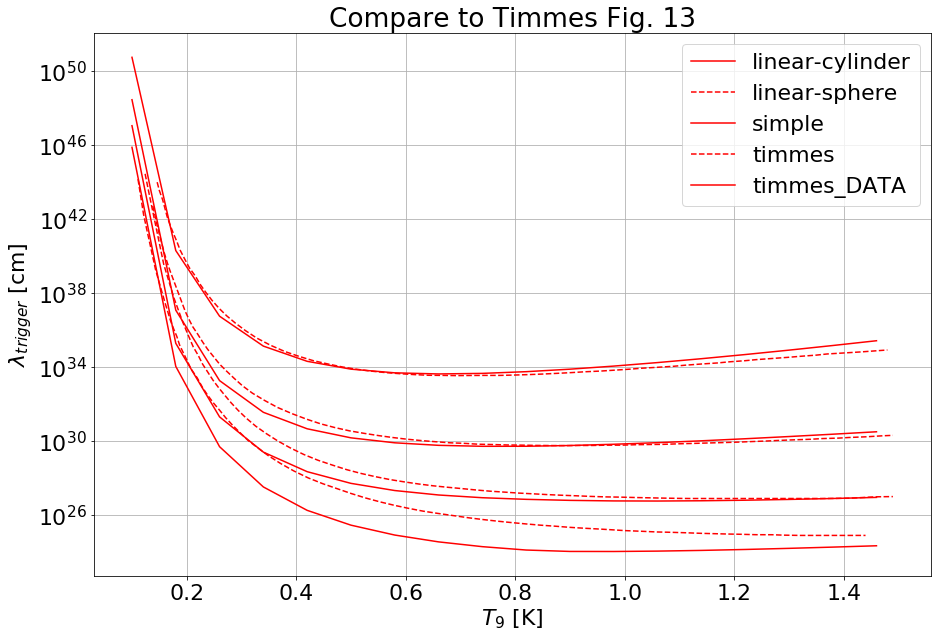

In [11]:
fig, ax = plt.subplots()
for i in range(4):
        #ax.plot(temps,linear_cylinder_masses[i],color='g')
        #ax.plot(temps,linear_sphere_masses[i],'g--')
        #ax.plot(temps,simple_masses[i],color='k')
        ax.plot(temps,np.array(timmes_Etrig[i]),color='r')
        #ax.plot(temps,np.array(timmes_widths[i]),color='r')
        #ax.plot(timmes_data[i,0],pow(3/(4*np.pi)*timmes_data[i,1]/rhos[i],1/3),'r--')
        ax.plot(timmes_data[i,0],0.9e5*ETimmes_trig(timmes_data[i,1]),'r--')

#ax.plot(Timmes2000DataLine1[::,0],Timmes2000DataLine1[::,1],'r')
#ax.plot(Timmes2000DataLine2[::,0],Timmes2000DataLine2[::,1],'r')
#ax.plot(Timmes2000DataLine3[::,0],Timmes2000DataLine3[::,1],'r')
#ax.plot(Timmes2000DataLine4[::,0],Timmes2000DataLine4[::,1],'r')


ax.set_yscale("log")
ax.set_ylabel(r"$\lambda_{trigger}$ [cm]")
ax.set_xlabel(r"$T_9$ [K]"  )
ax.set_title("Compare to Timmes Fig. 13")
ax.grid(which='both', axis='both')
ax.legend(['linear-cylinder','linear-sphere','simple',
        'timmes','timmes_DATA'])#,'Timmes','Timmes_data'])
plt.show()


timmes_fig2 not updated


NameError: name 'get_properties' is not defined

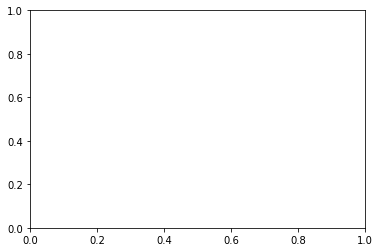

In [5]:
#BROKEN FOR NOW, OLD SYNTAX

def timmes_fig2(ratio=True): 
    print("timmes_fig2 not updated")
    fig, ax = plt.subplots()

    rhov = np.arange(2,9,0.1)
    tv = np.arange(6,11,0.1)

    rhom, tm = np.meshgrid(10**rhov, 10**tv)

    opacitym = get_properties(rhom,tm)

    TimmesData = np.array([[1009, 6448231],[3178, 11794467],  [16030, 29176619],  [50499, 57841262],  
    [278233, 148962490],  [1045722, 346904386],  [2182053, 450657034],  [6110740, 745379806],
    [7508264, 775997174],  [23652659, 1363375184],[95682620, 2813848425]])


    if ratio==True:
        z=np.log(opacitym[1]/opacitym[2])
        ax.scatter(TimmesData[::,0], TimmesData[::,1],c='r')
        ax.set_title(r"$\kappa_{rad} / \kappa_{cond}$ Compared with Timmes Data ")
    else:
        z=np.log(opacitym[0])
        ax.set_title(r"$\kappa_{tot}$ ")

    csfill = ax.contourf(rhom, tm,z  ,cmap=plt.cm.bone)        
    cs = ax.contour(rhom, tm, z )

    cbar = fig.colorbar(csfill)


    print("Worst point on Timmes opacity equality line gives kappa_rad = {0} kappa_cond ".format(get_properties(95682620,2813848425)[1]/get_properties(95682620,2813848425)[2]))

    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel("T [K]")

    ax.set_xlabel(r"$ \rho [cm^3 s^-1]$")

    plt.show()

timmes_fig2()

In [6]:


Timmes2000DataLine1 = np.sort(np.array([[0.146, 1.26   *1e24], [0.150, 
     4.63   *1e23], [0.156, 1.53   *1e23], [0.160, 
     5.79   *1e22], [0.164, 2.16   *1e22], [0.169, 
     8.34   *1e21], [0.175, 3.06   *1e21], [0.182, 
     1.04   *1e21], [0.188, 3.73   *1e20], [0.196, 
     1.34   *1e20], [0.205, 4.47   *1e19], [0.216, 
     1.65   *1e19], [0.224, 6.61   *1e18], [0.234, 
     2.60   *1e18], [0.246, 9.41   *1e17], [0.259, 
     3.60   *1e17], [0.273, 1.46   *1e17], [0.289, 
     6.07   *1e16], [0.307, 2.52   *1e16], [0.328, 
     1.02   *1e16], [0.353, 4.34   *1e15], [0.379, 
     2.06   *1e15], [0.405, 1.15   *1e15], [0.431, 
     6.89   *1e14], [0.458, 4.61   *1e14], [0.484, 
     3.25   *1e14], [0.510, 2.47   *1e14], [0.536, 
     1.98   *1e14], [0.563, 1.65   *1e14], [0.589, 
     1.45   *1e14], [0.615, 1.30   *1e14], [0.641, 
     1.20   *1e14], [0.667, 1.18   *1e14], [0.692, 
     1.15   *1e14], [0.720, 1.17   *1e14], [0.746, 
     1.18   *1e14], [0.772, 1.18   *1e14], [0.798, 
     1.23   *1e14], [0.825, 1.30   *1e14], [0.851, 
     1.39   *1e14], [0.877, 1.51   *1e14], [0.903, 
     1.65   *1e14], [0.929, 1.83   *1e14], [0.956, 
     1.98   *1e14], [0.982, 2.21   *1e14], [1.01, 
     2.49   *1e14], [1.03, 2.77   *1e14], [1.06, 3.11   *1e14], [1.09,
      3.52   *1e14], [1.11, 3.98   *1e14], [1.14, 
     4.60   *1e14], [1.17, 5.23   *1e14], [1.19, 5.94   *1e14], [1.22,
      6.84   *1e14], [1.24, 7.75   *1e14], [1.27, 
     8.94   *1e14], [1.30, 1.03   *1e15], [1.32, 1.15   *1e15], [1.35,
      1.33   *1e15], [1.37, 1.53   *1e15], [1.40, 
     1.72   *1e15], [1.43, 1.94   *1e15], [1.48, 
     2.46   *1e15]] ))

Timmes2000DataLine2 = np.array([[0.138, 7.32   *1e22], [0.142, 
     2.40   *1e22], [0.147, 5.30   *1e21], [0.159, 
     2.66   *1e20], [0.165, 7.44   *1e19], [0.170, 
     2.90   *1e19], [0.197, 2.61   *1e17], [0.204, 
     9.64   *1e16], [0.211, 3.95   *1e16], [0.220, 
     1.64   *1e16], [0.229, 6.42   *1e15], [0.238, 
     2.72   *1e15], [0.249, 1.11   *1e15], [0.260, 
     4.54   *1e14], [0.273, 1.94   *1e14], [0.287, 
     8.13   *1e13], [0.302, 3.38   *1e13], [0.320, 
     1.41   *1e13], [0.342, 5.96   *1e12], [0.366, 
     2.55   *1e12], [0.393, 1.20   *1e12], [0.419, 
     6.30   *1e11], [0.445, 3.59   *1e11], [0.471, 
     2.30   *1e11], [0.497, 1.57   *1e11], [0.524, 
     1.16   *1e11], [0.550, 8.90   *1e10], [0.576, 
     7.06   *1e10], [0.602, 5.77   *1e10], [0.629, 
     4.87   *1e10], [0.655, 4.25   *1e10], [0.681, 
     3.75   *1e10], [0.707, 3.51   *1e10], [0.733, 
     3.16   *1e10], [0.760, 3.04   *1e10], [0.786, 
     2.89   *1e10], [0.812, 2.83   *1e10], [0.838, 
     2.74   *1e10], [0.864, 2.70   *1e10], [0.891, 
     2.67   *1e10], [0.917, 2.72   *1e10], [0.943, 
     2.73   *1e10], [0.969, 2.83   *1e10], [0.995, 
     2.83   *1e10], [1.02, 2.98   *1e10], [1.05, 3.07   *1e10], [1.07,
      3.11   *1e10], [1.10, 3.33   *1e10], [1.13, 
     3.51   *1e10], [1.15, 3.65   *1e10], [1.18, 3.85   *1e10], [1.21,
      4.09   *1e10], [1.23, 4.32   *1e10], [1.26, 
     4.65   *1e10], [1.28, 4.96   *1e10], [1.31, 5.36   *1e10], [1.34,
      5.72   *1e10], [1.36, 6.20   *1e10], [1.39, 
     6.55   *1e10], [1.41, 7.07   *1e10], [1.44, 7.66   *1e10], [1.47,
      8.62   *1e10], [1.49, 9.14   *1e10]]) 

Timmes2000DataLine3 = np.array([[0.124, 3.41   *1e24], [0.131, 
     3.46   *1e23], [0.158, 6.88   *1e19], [0.177, 
     1.15   *1e18], [0.193, 6.64   *1e16], [0.199, 
     2.57   *1e16], [0.205, 1.01   *1e16], [0.212, 
     3.52   *1e15], [0.221, 1.29   *1e15], [0.229, 
     4.54   *1e14], [0.239, 1.65   *1e14], [0.248, 
     6.66   *1e13], [0.258, 2.78   *1e13], [0.269, 
     1.14   *1e13], [0.281, 4.49   *1e12], [0.294, 
     1.80   *1e12], [0.309, 7.02   *1e11], [0.326, 
     2.74   *1e11], [0.345, 1.14   *1e11], [0.366, 
     4.74   *1e10], [0.389, 2.05   *1e10], [0.414, 
     9.24   *1e9], [0.440, 4.63   *1e9], [0.467, 2.56   *1e9], [0.493,
      1.49   *1e9], [0.519, 9.54   *1e8], [0.545, 
     6.51   *1e8], [0.571, 4.64   *1e8], [0.598, 3.49   *1e8], [0.624,
      2.72   *1e8], [0.650, 2.20   *1e8], [0.676, 
     1.85   *1e8], [0.703, 1.57   *1e8], [0.729, 1.33   *1e8], [0.755,
      1.15   *1e8], [0.781, 1.03   *1e8], [0.807, 
     9.18   *1e7], [0.834, 8.39   *1e7], [0.860, 7.64   *1e7], [0.886,
      7.09   *1e7], [0.912, 6.65   *1e7], [0.938, 
     6.19   *1e7], [0.965, 5.84   *1e7], [0.991, 5.68   *1e7], [1.02, 
     5.41   *1e7], [1.04, 5.26   *1e7], [1.07, 5.05   *1e7], [1.10, 
     4.88   *1e7], [1.12, 4.82   *1e7], [1.15, 4.82   *1e7], [1.17, 
     4.81   *1e7], [1.20, 4.82   *1e7], [1.23, 4.80   *1e7], [1.25, 
     4.82   *1e7], [1.28, 4.82   *1e7], [1.31, 4.82   *1e7], [1.33, 
     4.82   *1e7], [1.36, 4.82   *1e7], [1.38, 4.86   *1e7], [1.41, 
     4.98   *1e7], [1.44, 5.51   *1e7], [1.46, 5.91   *1e7], [1.49, 
     6.05   *1e7]])
   

Timmes2000DataLine4 = np.array([[0.111, 1.82   *1e24], [0.121, 
     2.82   *1e22], [0.127, 4.42   *1e21], [0.137, 
     2.26   *1e20], [0.143, 3.69   *1e19], [0.151, 
     5.81   *1e18], [0.160, 7.55   *1e17], [0.170, 
     8.84   *1e16], [0.176, 3.10   *1e16], [0.182, 
     1.22   *1e16], [0.187, 4.43   *1e15], [0.194, 
     1.71   *1e15], [0.201, 6.60   *1e14], [0.208, 
     2.51   *1e14], [0.219, 8.91   *1e13], [0.229, 
     2.73   *1e13], [0.238, 1.13   *1e13], [0.249, 
     4.31   *1e12], [0.260, 1.85   *1e12], [0.271, 
     7.59   *1e11], [0.284, 3.01   *1e11], [0.298, 
     1.21   *1e11], [0.312, 4.97   *1e10], [0.330, 
     2.03   *1e10], [0.349, 8.08   *1e9], [0.371, 
     3.22   *1e9], [0.396, 1.28   *1e9], [0.422, 5.64   *1e8], [0.449,
      2.79   *1e8], [0.475, 1.55   *1e8], [0.501, 
     8.63   *1e7], [0.527, 5.10   *1e7], [0.554, 3.17   *1e7], [0.580,
      2.11   *1e7], [0.606, 1.47   *1e7], [0.632, 
     1.06   *1e7], [0.659, 8.09   *1e6], [0.685, 6.35   *1e6], [0.716,
      4.76   *1e6], [0.742, 3.87   *1e6], [0.768, 
     3.20   *1e6], [0.795, 2.68   *1e6], [0.821, 2.29   *1e6], [0.847,
      1.98   *1e6], [0.873, 1.76   *1e6], [0.899, 
     1.54   *1e6], [0.926, 1.38   *1e6], [0.952, 1.26   *1e6], [0.978,
      1.14   *1e6], [1.00, 1.04   *1e6], [1.03, 9.61   *1e5], [1.06, 
     8.81   *1e5], [1.08, 8.55   *1e5], [1.11, 8.06   *1e5], [1.14, 
     7.49   *1e5], [1.16, 7.24   *1e5], [1.19, 6.88   *1e5], [1.21, 
     6.72   *1e5], [1.24, 6.37   *1e5], [1.27, 6.34   *1e5], [1.29, 
     6.04   *1e5], [1.32, 5.84   *1e5], [1.34, 5.84   *1e5], [1.37, 
     5.84   *1e5], [1.40, 5.84   *1e5], [1.42, 5.84   *1e5], [1.44, 
     5.84   *1e5]]) 
